In [ ]:

from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import cv2

We are using imread method by OpenCV to read the image. And then, we are converting the color format from BGR to RGB using cvtColor. The everyday images that we see on our devices are in RGB format.

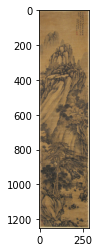

In [ ]:
image = cv2.imread('/content/72710.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

Using function rgb_to_hex. Instead of having three different values (red, green, blue), we will have one output: hex value.


In [ ]:
# converting an RGB color into Hex color format. 

def rgb_to_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

We will resize and reshape the image in this step. Resizing is optional, but reshaping is needed for the color analysis model to work correctly.

In [ ]:
# preprocessing of the image

def prep_image(raw_img):
    modified_img = cv2.resize(raw_img, (900, 600), interpolation = cv2.INTER_AREA)
    modified_img = modified_img.reshape(modified_img.shape[0]*modified_img.shape[1], 3)
    return modified_img

In [ ]:
# colour analysis 

def color_analysis(img):
    clf = KMeans(n_clusters = 5)
    color_labels = clf.fit_predict(img)
    center_colors = clf.cluster_centers_
    counts = Counter(color_labels)
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
    plt.figure(figsize = (12, 8))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    plt.savefig("color_analysis_report.png")
    print(hex_colors)

['#8c704a', '#695741', '#e1ceab', '#483e32', '#a48355']


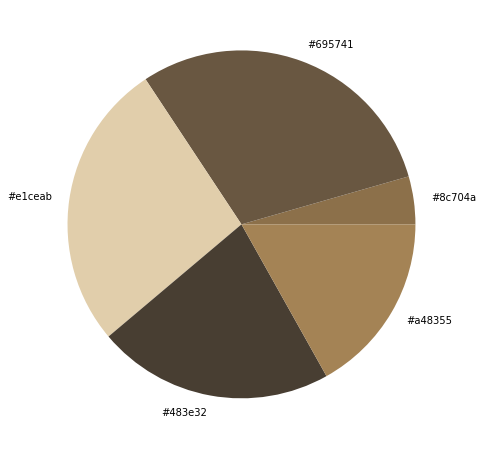

In [ ]:
modified_image = prep_image(image)
color_analysis(modified_image)

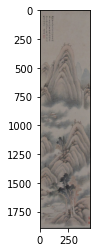

In [ ]:
image2 = cv2.imread('/content/36017.jpeg')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
plt.imshow(image2)

['#877f79', '#4a4746', '#948d86', '#66625f', '#78726d']


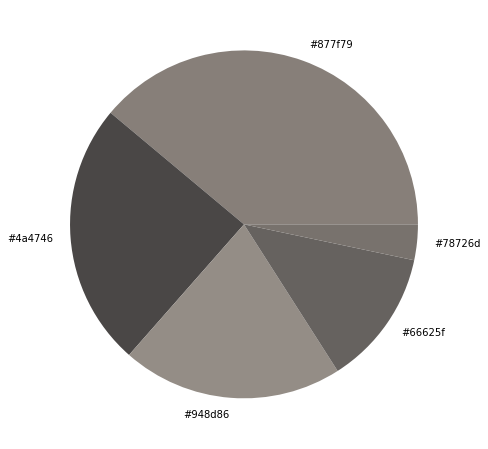

In [ ]:
modified_image2 = prep_image(image2)
color_analysis(modified_image2)

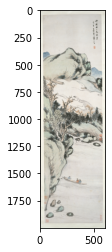

In [ ]:
image3 = cv2.imread('/content/49451.jpeg')
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
plt.imshow(image3)

['#aeaca2', '#e7e4dc', '#807f76', '#50514a', '#d3d0c7']


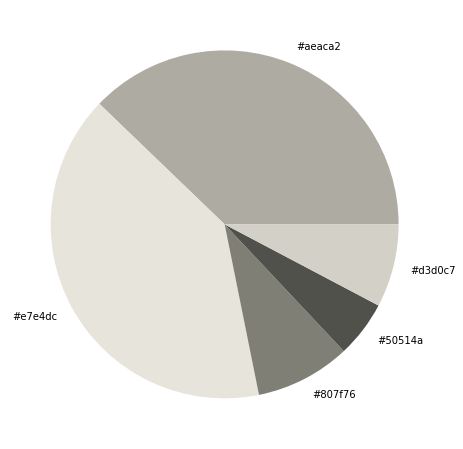

In [ ]:
modified_image3 = prep_image(image3)
color_analysis(modified_image3)